### Importing Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score,precision_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('Zoo.csv')

### EDA

In [4]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
df['animal name'].value_counts()

frog        2
girl        1
mongoose    1
clam        1
honeybee    1
           ..
kiwi        1
starfish    1
porpoise    1
dove        1
lobster     1
Name: animal name, Length: 100, dtype: int64

In [6]:
df['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

<AxesSubplot:xlabel='type', ylabel='count'>

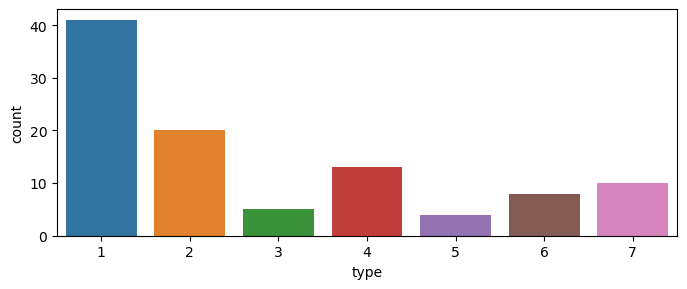

In [7]:
ax = figure(figsize=(8,3),dpi=100)
sns.countplot(data=df,x='type')

### KNN Model building and tuning

In [8]:
X = df.drop(["animal name","type"],axis=1)
X.head(2)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1


In [9]:
y = df["type"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
scaler = StandardScaler()

In [12]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [13]:
knn_model = KNeighborsClassifier()

In [14]:
test_error_rates = []
test_error_recall = []
test_error_precision = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    # As data set is im-balanced we cannot only rely on accuracy score.
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)
    
    # Recall 
    recall_error = recall_score(y_test,y_pred_test,labels=df['type'],average='micro') 
    test_error_recall.append(recall_error)
    
    # Percision 
    percision_error = precision_score(y_test,y_pred_test,labels=df['type'],average='micro')
    test_error_precision.append(percision_error)

### Visualizing Error Metrics 

Text(0.5, 1.0, 'Error')

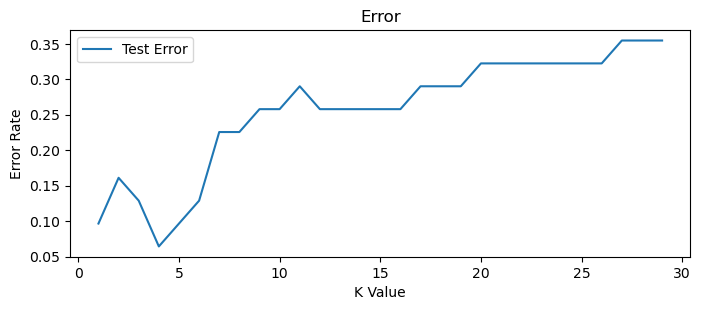

In [15]:
plt.figure(figsize=(8,3),dpi=100)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")
plt.title("Error")

Text(0.5, 1.0, 'Recall')

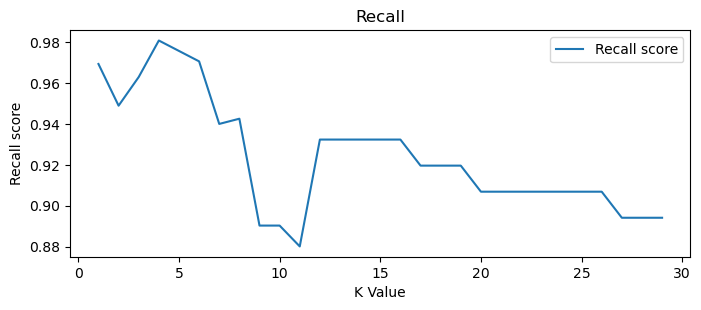

In [16]:
plt.figure(figsize=(8,3),dpi=100)
plt.plot(range(1,30),test_error_recall,label='Recall score')
plt.legend()
plt.ylabel('Recall score')
plt.xlabel("K Value")
plt.title("Recall")

Text(0.5, 1.0, 'Percision')

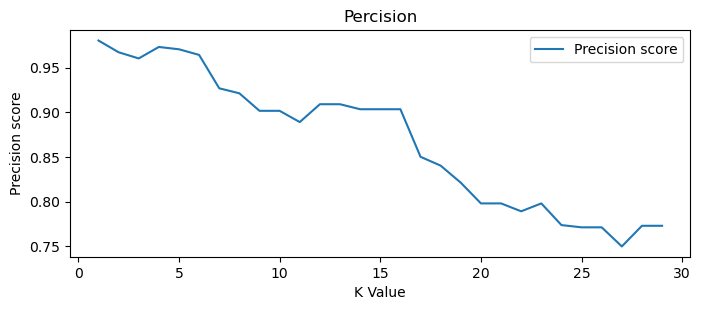

In [17]:
plt.figure(figsize=(8,3),dpi=100)
plt.plot(range(1,30),test_error_precision,label='Precision score')
plt.legend()
plt.ylabel('Precision score')
plt.xlabel("K Value")
plt.title("Percision")

### Final model

In [18]:
# We have highest accuracy,recall and percision on k=4.

knn_model = KNeighborsClassifier(n_neighbors=4)

In [19]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

### Predictions and Model Validation

In [20]:
# Predictions
y_pred = knn_model.predict(scaled_X_test)

In [21]:
print(classification_report(y_test,y_pred,zero_division=1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       1.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.94        31
   macro avg       0.93      0.81      0.79        31
weighted avg       0.95      0.94      0.92        31



In [22]:
rs = recall_score(y_test,y_pred,labels=df['type'],average='micro')
rs

0.9808673469387755

In [23]:
ps = precision_score(y_test,y_pred,labels=df['type'],average='micro')

In [24]:
ps

0.9734177215189873

In [25]:
# # Since data-set was imbalanced we prefer recall and precision scores
# Which in our model are quite good.

In [26]:
cm = confusion_matrix(y_test,y_pred)

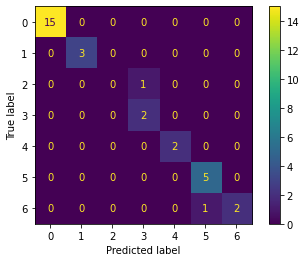

In [27]:
cfx = ConfusionMatrixDisplay(confusion_matrix=cm)
cfx.plot()